# Pymaceuticals Inc.
---

### Analysis

- The initial observation in my analysis is that Capomulin appears to be effective in treating squamous cell carcinoma. In looking at mouse l509, we could see that the tumor size decreased over time, as compared with other treatment regimens. The next most effective drug in decreasing tumor size is Ramicane. This is important because we see that the weight of mice and tumor size are directly related. As the weight increases so does tumor size. The correlation shown below, 0.84, suggests that there is a linear correlation. This suggests that healthier mice that are treated with Capomulin have a better chance of achieving the goal that Pymaceutical, Inc. intends to achieve.
 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_metadata = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.
number_of_mice = merged_metadata['Mouse ID'].nunique()
number_of_mice

249

In [114]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_metadata[merged_metadata.duplicated('Mouse ID', keep=False)]

unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()

unique_mouse = merged_metadata[merged_metadata['Mouse ID'] == 'g989']['Mouse ID'].unique()

unique_mouse

array(['g989'], dtype=object)

In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_metadata[merged_metadata.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice = merged_metadata[merged_metadata['Mouse ID'].isin(duplicate_mice)]

duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'
deduped_data = merged_metadata[merged_metadata['Mouse ID'] != duplicate_mouse_id]

deduped_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = deduped_data['Mouse ID'].nunique()

number_of_mice

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = deduped_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Standard_Deviation='std',
    Tumor_Volume_SEM='sem'
)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = summary_statistics_df.rename(columns={
    'Mean_Tumor_Volume': 'Mean Tumor Volume',
    'Median_Tumor_Volume': 'Median Tumor Volume',
    'Tumor_Volume_Variance': 'Tumor Volume Variance',
    'Tumor_Volume_Standard_Deviation': 'Tumor Volume Std. Dev.',
    'Tumor_Volume_SEM': 'Tumor Volume Std. Err.'
})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggr = deduped_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean = 'mean',
    median = 'median',
    var = 'var',
    std = 'std',
    sem = 'sem'
)
summary_statistics_aggr.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], summary_statistics_aggr.columns])

summary_statistics_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

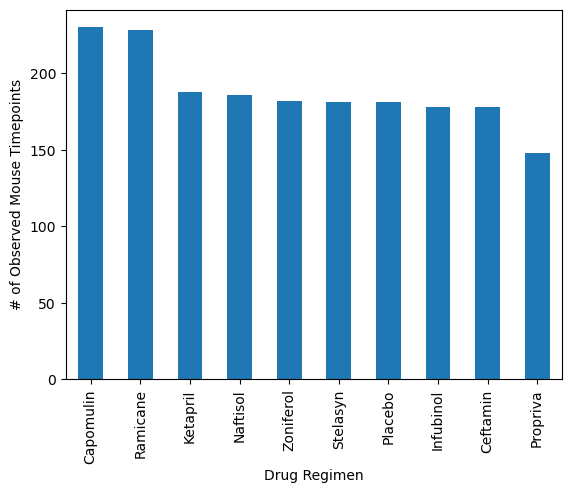

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_group = deduped_data.groupby('Drug Regimen').count()['Mouse ID']

drug_regimen_group_df = drug_regimen_group.reset_index()

drug_regimen_group_df_sorted = drug_regimen_group_df.sort_values(by=['Mouse ID', 'Drug Regimen'], ascending=[False, False])

drug_regimen_group_df_sorted.set_index('Drug Regimen')['Mouse ID'].plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


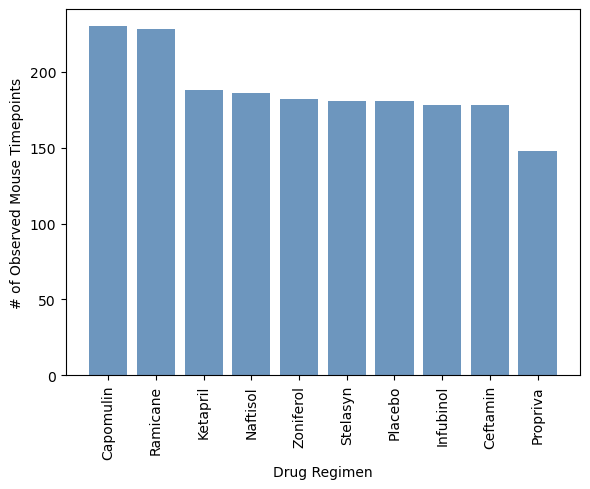

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_group = deduped_data.groupby('Drug Regimen').count()['Mouse ID'].reset_index(name='Count')

drug_regimen_group_sorted = drug_regimen_group.sort_values(by=['Count', 'Drug Regimen'], ascending=[True, True])

drug_regimen_group_sorted = drug_regimen_group_sorted.iloc[::-1]

drug_regimen = drug_regimen_group_sorted['Drug Regimen']
counts = drug_regimen_group_sorted['Count']

dark_blue_hex = '#3c73a8'  # 1f77b4

plt.figure(figsize=(6, 5))
plt.bar(drug_regimen, counts, color=dark_blue_hex, alpha=0.75)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

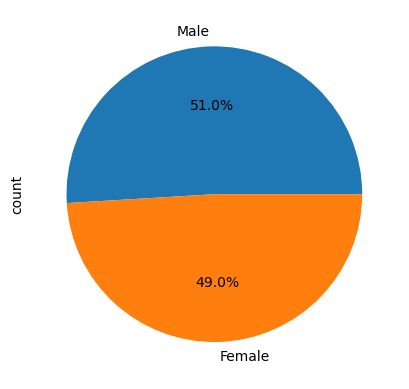

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distrib = deduped_data.Sex.value_counts()

sex_distrib.plot(kind='pie', autopct='%1.1f%%', startangle=360)

plt.show()

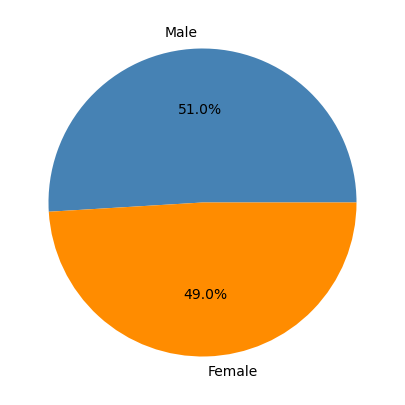

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_distrib.index
sizes = sex_distrib.values
colors = ['steelblue', 'darkorange']
explode = (0, 0)

plt.figure(figsize=(6, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=360)

plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = deduped_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_timepoint_data = pd.merge(last_timepoint, deduped_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_timepoint_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [125]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
for treatment in treatments_list:
    final_volume_data = merged_timepoint_data[merged_timepoint_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    tumor_vol_data.append(final_volume_data)

    quartiles = final_volume_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
# Determine outliers using upper and lower bounds
    outliers = final_volume_data[(final_volume_data < lower_bound) | (final_volume_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


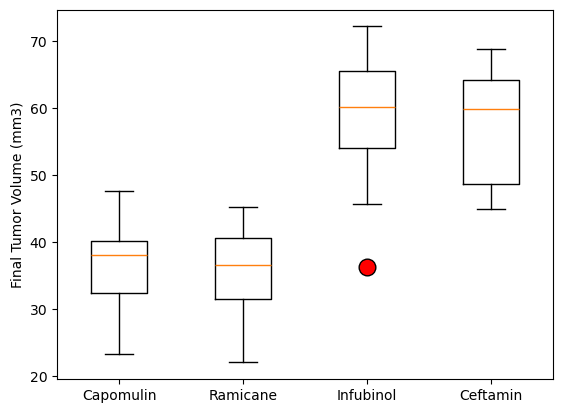

In [126]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Creating a box plot
box = plt.boxplot(tumor_vol_data, labels= treatments_list) #, patch_artist=True)

# Customizing the outlier markers
for flier in box['fliers']:
    flier.set(marker='o', markerfacecolor='red', markersize=12)  # Customize marker size and color for outliers

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

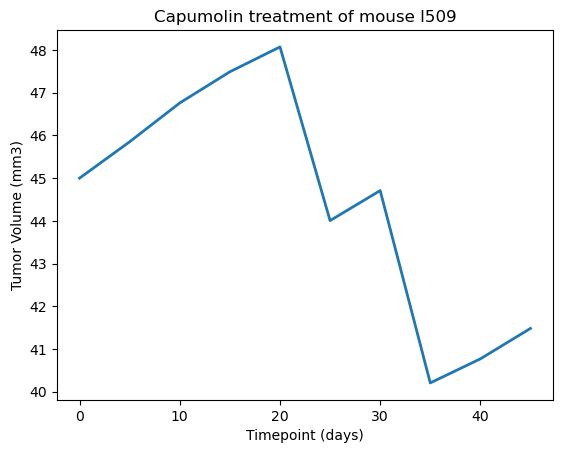

In [127]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = deduped_data.loc[deduped_data["Mouse ID"] == "l509"]
line_plot_df

# Define the data needed for plotting
x_axis_timepoint = line_plot_df["Timepoint"]

# Declare the data needed for y-axis tumor volume
tumor_size = line_plot_df["Tumor Volume (mm3)"]

# Create the plot title
plt.title("Capumolin treatment of mouse l509")

# Define plot values and labels
plt.plot(x_axis_timepoint, tumor_size, linewidth=2, markersize=12)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")

plt.savefig('linechart')
plt.show()


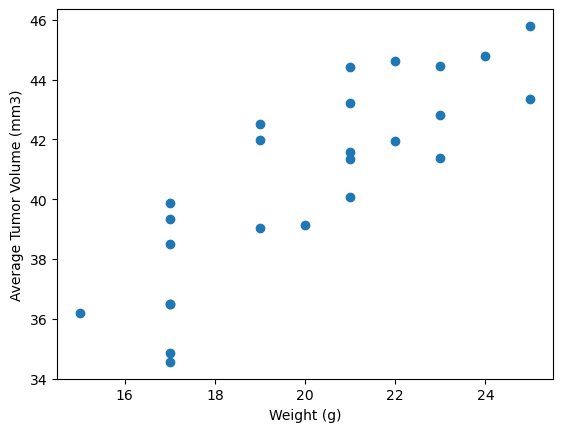

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen_df = merged_metadata.loc[merged_metadata["Drug Regimen"] == "Capomulin"]

# Create a DataFrame for the average
capomulin_avg = capomulin_regimen_df.groupby(["Mouse ID"]).mean(numeric_only=True)

# Define plot values and labels
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


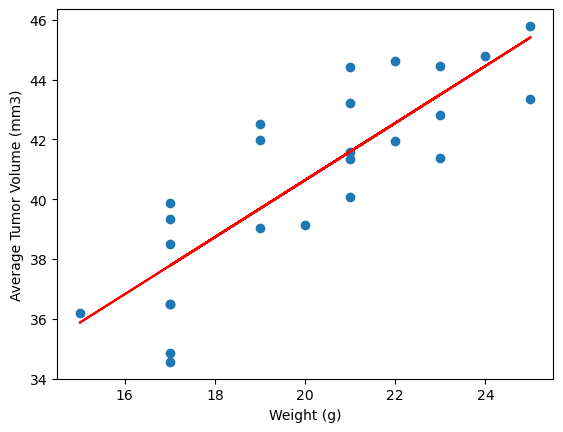

In [129]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capumolin_avg["Weight (g)"], capumolin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Calculate linear regression model
lr_model=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
lr_model

# Assign the value to Linear Regression results
slope = 0.9544396890241049
intercept = 21.552160532685008
rvalue = 0.8419363424694721
pvalue = 1.3225722434712404e-07

# Calculate linear line plot list
plot_line = slope*(capomulin_avg["Weight (g)"]) + intercept

# Create scatter plot
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

# Define plot values and labels
plt.plot(capomulin_avg["Weight (g)"], plot_line, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.savefig('linearregression')
plt.show()